# THE BATTLE OF NEIGHBORHOODS

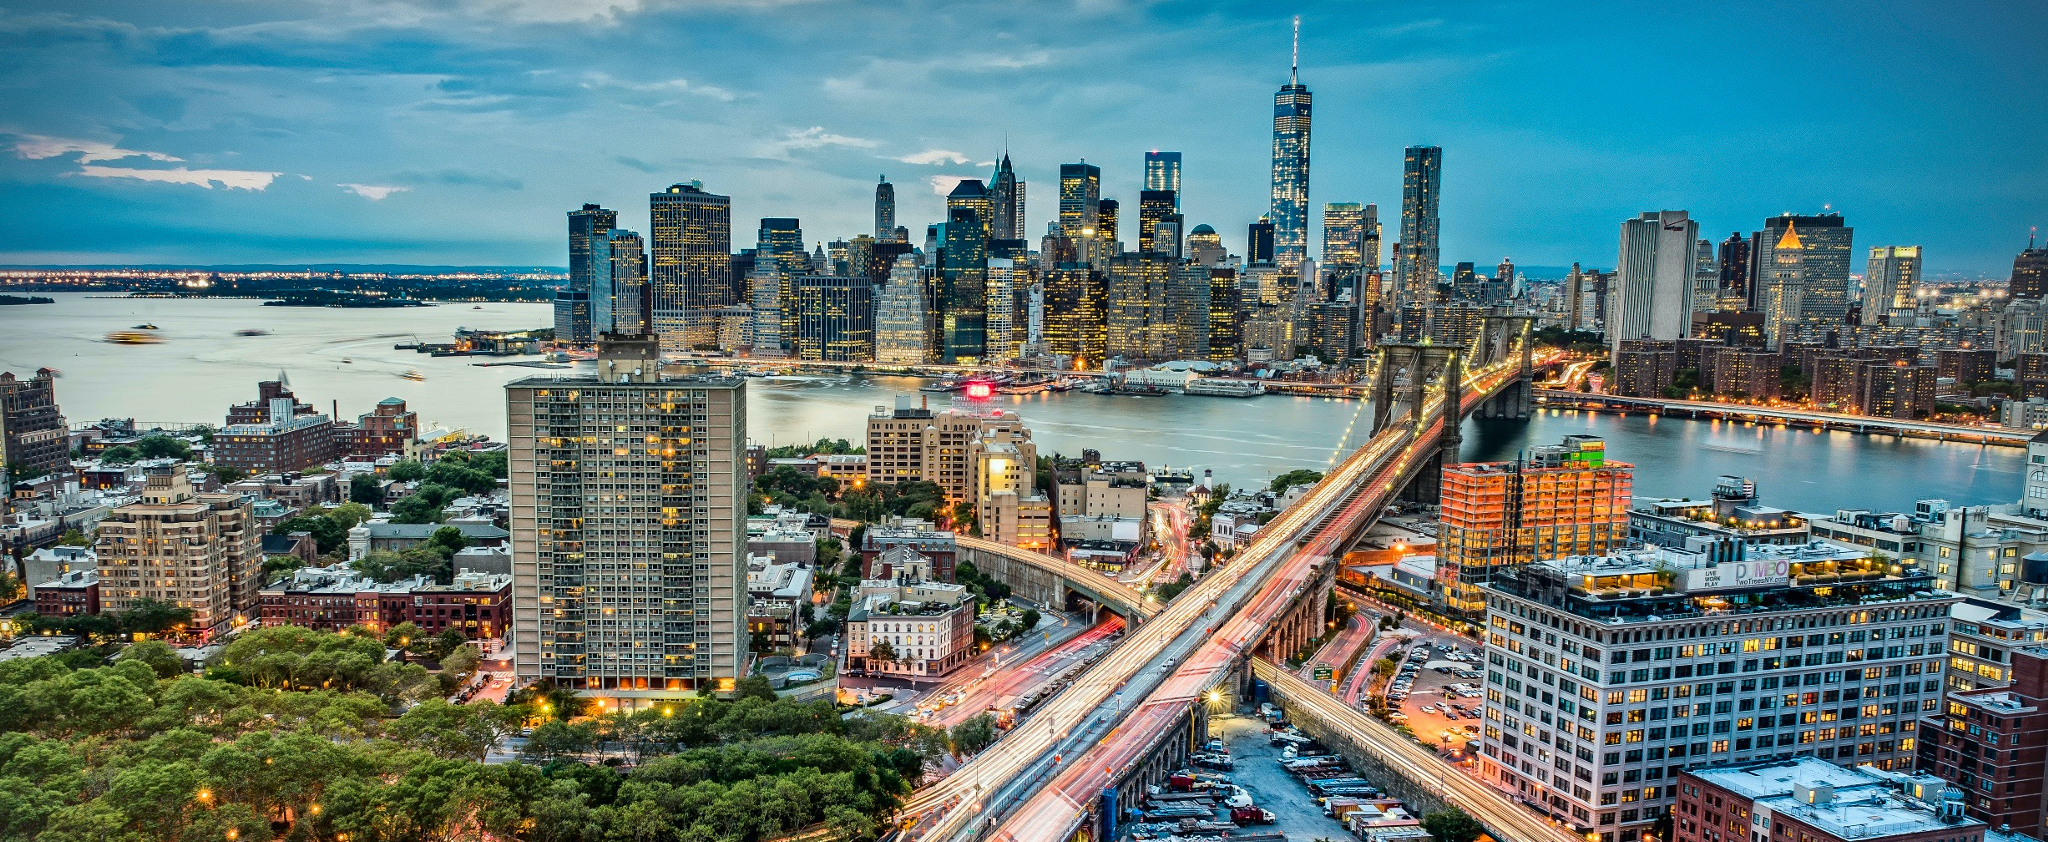

In [1]:
from IPython.display import Image
Image(filename='nyc.jpg') 




## 1. Introduction and Business Problem Statement
__New York City__ is the most populous city in the United States with estimated population of around __8.4 Million__. It is also the most densly populated city in the United States. With over __3.2 Million__ residents born outside the US, NYC is one of the most ethnically diverse cities. As we all know, with ethnic diversity comes diversity of cuisines. 
NYC is home to more than __27,000__ restaurants with Queens alone serving food from around __85__ Countries.

> _The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world"_  
  -Michelin

As a part of the Coursera Applied Data Science Capstone Project, we are going to explore the various restaurants based on their ratings and neighborhoods and cluster them together to visualize neighborhoods based on their famous cuisines.

- Target Audience - Curious Foodies wanting to explore cuisine in NYC  

_Even though this notebook gives a crude idea, it can be converted to a feasible interactive user interface later on._

## 2. Data
New York City has a total of _5 boroughs_ and _306 neighborhoods_. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 
The dataset mentioned below contains each Neighborhood stored as a key Feature on JSON format. 

- NYC Boroughs/Neighborhood Geospatial Dataset (Raw) : https://geo.nyu.edu/catalog/nyu_2451_34572  


- NYC Boroughs/Neighborhood Geospatial Dataset (Cleaned) : https://cocl.us/new_york_dataset

Alongside this data, we are going to use the Foursquare API to get venue details for each neighborhood in the above dataset classified under Food Category.

- Venue details: https://developer.foursquare.com/


- Food Category: 4d4b7105d754a06374d81259  


- Geospatial Coordinated for testing data: Geopy Library - https://geopy.readthedocs.io/en/stable/


__We will explore the NYC neighborhood dataset below__  

In [5]:
## Import the required libraries
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import json # library to handle JSON files

print('Libraries imported')

Libraries imported


In [6]:
# Let's download and explore the above mentioned datasets
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
# Open the json file containing NYC data and display a feature
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)  

In [15]:
# newyork_data ##Uncomment to print whole json data

In [16]:
## Load the neighborhood data that is store in features in above data
neighborhoods_data = newyork_data['features']

In [174]:
## Display neighborhood data -  1st element
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [28]:
## Import Folium to display maps
import folium
print('Folium Library imported')

Folium Library imported


In [31]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [32]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [33]:
## Storing only the required data in a dataframe from above dictionaries
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [38]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [41]:
neighborhoods.shape ## 306 neighborhoods and 5 boroughs

(306, 4)

In [42]:
from geopy.geocoders import Nominatim
# from url import Nominatim
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [259]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
map_newyork

In [79]:
neighborhoods.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [111]:
## Repeated following code for each borough name ['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island']
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [104]:
folium.Marker([40.7896239, -73.9598939], popup='Manhattan',icon=folium.Icon(color='blue')).add_to(map_newyork)
folium.Marker([40.7498243, -73.7976337], popup='Queens',icon=folium.Icon(color='darkred')).add_to(map_newyork)
folium.Marker([40.8466508, -73.8785937], popup='Bronx',icon=folium.Icon(color='green')).add_to(map_newyork)
folium.Marker([40.6501038, -73.9495823], popup='Brooklyn',icon=folium.Icon(color='purple')).add_to(map_newyork)
folium.Marker([40.5834557, -74.1496048], popup='Staten Island',icon=folium.Icon(color='orange')).add_to(map_newyork)

In [137]:
for lat, lng, borough,neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'],neighborhoods['Borough'], neighborhoods['Neighborhood']):
    poptext = '{},{}'.format(neighborhood, borough)
    neigh = folium.Popup(poptext, parse_html=True)
    if borough =='Manhattan':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if borough =='Staten Island':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='yellow',
            fill=True,
            fill_color='#fcba03',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if borough =='Bronx':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='green',
            fill=True,
            fill_color='#78f76d',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork) 
    if borough =='Queens':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='red',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)
    if borough =='Brooklyn':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='purple',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork) 

In [138]:
map_newyork

In [158]:
## Setup credentials for Foursquare API
CLIENT_ID = 'ZGQDH4KDRXB5SPJ3PUNPLKFEWA540AJ0T41BMRELAD3WFSJG' #Foursquare ID
CLIENT_SECRET = '' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZGQDH4KDRXB5SPJ3PUNPLKFEWA540AJ0T41BMRELAD3WFSJG
CLIENT_SECRET:


In [118]:
## Test data on Marbel Hill Neighborhood
neighborhood_latitude = 40.87655077879964
neighborhood_longitude = -73.91065965862981
print(str(neighborhood_latitude) + ', '+ str(neighborhood_longitude))

40.87655077879964, -73.91065965862981


In [121]:
## Constructing the GET url for Foursquare API Call
## Test URL for Marbel Hill Neighborhood
LIMIT = 100
radius = 500
categoryId = '4d4b7105d754a06374d81259'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    categoryId,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZGQDH4KDRXB5SPJ3PUNPLKFEWA540AJ0T41BMRELAD3WFSJG&client_secret=GMA4LNK5UVBNO3XJF2H5VZPRYRXTKJSRP1VM15NDOND2DNJN&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&categoryId=4d4b7105d754a06374d81259&limit=100'

In [123]:
import requests
results = requests.get(url).json()

In [266]:
# results ## Uncomment to view complete JSON Response from Foursquare API for Marble Hill

In [126]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [129]:
# function that extracts the category of the venue
## Note: We have already requested venue only for Food Category. The category now will be the sub category.

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [135]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat        lng
0               Arturo's         Pizza Place  40.874412 -73.910271
1          Tibbett Diner               Diner  40.880404 -73.908937
2                Dunkin'          Donut Shop  40.877136 -73.906666
3                 Subway      Sandwich Place  40.874832 -73.909950
4  Land & Sea Restaurant  Seafood Restaurant  40.877885 -73.905873

In [258]:
print('{} venues were returned by Foursquare for Marbel Hill Neighborhood.'.format(nearby_venues.shape[0]))

17 venues were returned by Foursquare for Marbel Hill Neighborhood.


## 3. Methodology

In [140]:
## Create a function for requesting and storing nearby Food Venues for each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            categoryId,
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [260]:
neighborhoods_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )
print('Neighborhood Venues Downloaded')

Neighborhood Venues Downloaded


In [142]:
neighborhoods_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude         Venue  \
0    Wakefield              40.894705              -73.847201       Dunkin'   
1    Wakefield              40.894705              -73.847201        Subway   
2    Wakefield              40.894705              -73.847201   Pitman Deli   
3    Wakefield              40.894705              -73.847201  Central Deli   
4    Wakefield              40.894705              -73.847201   Louis Pizza   

   Venue Latitude  Venue Longitude  Venue Category  
0       40.890459       -73.849089      Donut Shop  
1       40.890468       -73.849152  Sandwich Place  
2       40.896744       -73.844398            Food  
3       40.896728       -73.844387   Deli / Bodega  
4       40.898399       -73.848810     Pizza Place

In [145]:
##Writing dataframe to a csv file to use in future
neighborhoods_venues.to_csv('NYC_neighborhood_food_venue_500m_limit100.csv') 

In [149]:
# neighborhoods_venues.groupby('Neighborhood').count()

In [151]:
## Exploring all the unique food venue categories in above data
print('There are {} uniques categories.'.format(len(neighborhoods_venues['Venue Category'].unique())))

There are 136 uniques categories.


In [152]:
neighborhoods_venues['Venue Category'].unique()

array(['Donut Shop', 'Sandwich Place', 'Food', 'Deli / Bodega',
       'Pizza Place', 'Bagel Shop', 'Fast Food Restaurant', 'Restaurant',
       'Chinese Restaurant', 'Fried Chicken Joint',
       'Caribbean Restaurant', 'Diner', 'Seafood Restaurant', 'Bakery',
       'Food Truck', 'Latin American Restaurant', 'Burger Joint',
       'Spanish Restaurant', 'Mexican Restaurant', 'Wings Joint', 'Café',
       'Breakfast Spot', 'Asian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Snack Place',
       'American Restaurant', 'Steakhouse', 'Indian Restaurant',
       'Italian Restaurant', 'Cafeteria', 'Soup Place',
       'Sushi Restaurant', 'French Restaurant', 'Tapas Restaurant',
       'African Restaurant', 'Burrito Place', 'Buffet',
       'Greek Restaurant', 'Paella Restaurant', 'Fish & Chips Shop',
       'Peruvian Restaurant', 'BBQ Joint', 'South American Restaurant',
       'South Indian Restaurant', 'Southern / Soul Food Restaurant',
       'Middle Eastern Restaurant', 'Arepa 

In [153]:
## Analyzing each neighborhood

# one hot encoding
neighborhoods_onehot = pd.get_dummies(neighborhoods_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighborhoods_onehot['Neighborhood'] = neighborhoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neighborhoods_onehot.columns[-1]] + list(neighborhoods_onehot.columns[:-1])
neighborhoods_onehot = neighborhoods_onehot[fixed_columns]

neighborhoods_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    Wakefield                  0                   0                    0   
1    Wakefield                  0                   0                    0   
2    Wakefield                  0                   0                    0   
3    Wakefield                  0                   0                    0   
4    Wakefield                  0                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 0   
1                 0                       0                 0   
2                 0                       0                 0   
3                 0                       0                 0   
4                 0                       0                 0   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  ...  \
0                      0                    0          0  ...   
1                      0                    0          0  ...   
2                      0                    0          0  ...   
3                      0                    0          0  ...   
4                      0                    0          0  ...   

   Theme Restaurant  Tibetan Restaurant  Turkish Restaurant  Udon Restaurant  \
0                 0                   0                   0                0   
1                 0                   0                   0                0   
2                 0                   0                   0                0   
3                 0                   0                   0                0   
4                 0                   0                   0                0   

   Ukrainian Restaurant  Varenyky restaurant  Vegetarian / Vegan Restaurant  \
0                     0                    0                              0   
1                     0                    0                              0   
2                     0                    0                              0   
3                     0                    0                              0   
4                     0                    0                              0   

   Venezuelan Restaurant  Vietnamese Restaurant  Wings Joint  
0                      0                      0            0  
1                      0                      0            0  
2                      0                      0            0  
3                      0                      0            0  
4                      0                      0            0  

[5 rows x 137 columns]

In [154]:
neighborhoods_onehot.shape

(8183, 137)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [155]:
neighborhoods_grouped = neighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
neighborhoods_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0              Allerton           0.000000                0.00   
1              Annadale           0.000000                0.00   
2         Arden Heights           0.000000                0.00   
3             Arlington           0.000000                0.00   
4              Arrochar           0.000000                0.00   
5               Arverne           0.000000                0.00   
6               Astoria           0.000000                0.00   
7       Astoria Heights           0.000000                0.00   
8            Auburndale           0.000000                0.00   
9            Bath Beach           0.000000                0.00   
10    Battery Park City           0.000000                0.00   
11            Bay Ridge           0.000000                0.00   
12          Bay Terrace           0.000000                0.00   
13           Baychester           0.000000                0.00   
14              Bayside           0.000000                0.00   
15         Bedford Park           0.000000                0.00   
16   Bedford Stuyvesant           0.000000                0.00   
17           Beechhurst           0.000000                0.00   
18             Bellaire           0.000000                0.00   
19         Belle Harbor           0.000000                0.00   
20            Bellerose           0.000000                0.00   
21              Belmont           0.000000                0.00   
22          Bensonhurst           0.000000                0.00   
23         Bergen Beach           0.000000                0.00   
24           Blissville           0.000000                0.00   
25           Bloomfield           0.000000                0.00   
26          Boerum Hill           0.000000                0.00   
27         Borough Park           0.000000                0.00   
28            Briarwood           0.000000                0.00   
29       Brighton Beach           0.000000                0.00   
..                  ...                ...                 ...   
263              Travis           0.000000                0.00   
264             Tribeca           0.000000                0.00   
265          Tudor City           0.000000                0.00   
266          Turtle Bay           0.000000                0.00   
267           Unionport           0.000000                0.00   
268  University Heights           0.000000                0.04   
269     Upper East Side           0.000000                0.00   
270     Upper West Side           0.000000                0.00   
271              Utopia           0.111111                0.00   
272            Van Nest           0.000000                0.00   
273        Vinegar Hill           0.000000                0.00   
274           Wakefield           0.000000                0.00   
275  Washington Heights           0.000000                0.00   
276          Weeksville           0.000000                0.00   
277       West Brighton           0.000000                0.00   
278          West Farms           0.000000                0.00   
279        West Village           0.000000                0.00   
280  Westchester Square           0.000000                0.00   
281         Westerleigh           0.000000                0.00   
282          Whitestone           0.000000                0.00   
283      Williamsbridge           0.000000                0.00   
284        Williamsburg           0.000000                0.00   
285         Willowbrook           0.000000                0.00   
286     Windsor Terrace           0.000000                0.00   
287             Wingate           0.000000                0.00   
288           Woodhaven           0.000000                0.00   
289            Woodlawn           0.000000                0.00   
290             Woodrow           0.000000                0.00   
291            Woodside           0.000000         

In [156]:
neighborhoods_grouped.shape

(293, 137)

In [261]:
## Print top 5 venues for each neighborhood
num_top_venues = 5
cnt = 0
for hood in neighborhoods_grouped['Neighborhood']:
    cnt+=1
    if cnt <6: ## Remove if loop and cnt to display all Neighborhoods
        print("----"+hood+"----")
        temp = neighborhoods_grouped[neighborhoods_grouped['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')
    else:
        break

----Allerton----
                venue  freq
0         Pizza Place  0.25
1       Deli / Bodega  0.17
2              Bakery  0.12
3  Chinese Restaurant  0.08
4                Food  0.08


----Annadale----
                 venue  freq
0          Pizza Place  0.33
1  American Restaurant  0.20
2               Bakery  0.13
3                Diner  0.07
4        Deli / Bodega  0.07


----Arden Heights----
                  venue  freq
0         Deli / Bodega   0.5
1           Pizza Place   0.5
2            Poke Place   0.0
3     Paella Restaurant   0.0
4  Pakistani Restaurant   0.0


----Arlington----
                 venue  freq
0  American Restaurant  0.50
1        Deli / Bodega  0.25
2          Pizza Place  0.25
3    Afghan Restaurant  0.00
4           Poke Place  0.00


----Arrochar----
                venue  freq
0         Pizza Place  0.20
1  Italian Restaurant  0.13
2          Bagel Shop  0.13
3       Deli / Bodega  0.13
4   Polish Restaurant  0.07




In [159]:
## Return most common venues for each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [162]:
## Create a dataframe from above data for top 5 venues/neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhoods_grouped['Neighborhood']

for ind in np.arange(neighborhoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place         Deli / Bodega   
1       Annadale           Pizza Place   American Restaurant   
2  Arden Heights         Deli / Bodega           Pizza Place   
3      Arlington   American Restaurant         Deli / Bodega   
4       Arrochar           Pizza Place         Deli / Bodega   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery    Chinese Restaurant                  Food  
1                Bakery            Restaurant         Deli / Bodega  
2                 Diner            Donut Shop            Dosa Place  
3           Pizza Place            Donut Shop            Dosa Place  
4    Italian Restaurant            Bagel Shop     Polish Restaurant

### Clustering the Neighborhoods based on these features

In [163]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries Imported')

Libraries Imported


In [208]:
# set number of clusters
kclusters = 6

neighborhoods_grouped_clustering = neighborhoods_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhoods_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([3, 3, 4, 3, 3, 5, 5, 3, 5, 5], dtype=int32)

In [216]:
# Code to enable display of all rows and columns in df
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [221]:

neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1)
neighborhoods_venues_sorted.head(10)

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0         Allerton                Pizza Place         Deli / Bodega   
1         Annadale                Pizza Place   American Restaurant   
2    Arden Heights              Deli / Bodega           Pizza Place   
3        Arlington        American Restaurant         Deli / Bodega   
4         Arrochar                Pizza Place         Deli / Bodega   
5          Arverne             Sandwich Place            Restaurant   
6          Astoria  Middle Eastern Restaurant      Greek Restaurant   
7  Astoria Heights              Deli / Bodega    Italian Restaurant   
8       Auburndale        American Restaurant    Italian Restaurant   
9       Bath Beach         Chinese Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery    Chinese Restaurant                  Food  
1                Bakery            Restaurant         Deli / Bodega  
2                 Diner            Donut Shop            Dosa Place  
3           Pizza Place            Donut Shop            Dosa Place  
4    Italian Restaurant            Bagel Shop     Polish Restaurant  
5                  Café            Donut Shop           Pizza Place  
6     Indian Restaurant         Deli / Bodega           Pizza Place  
7    Chinese Restaurant           Pizza Place                Bakery  
8     Korean Restaurant            Food Truck          Noodle House  
9      Halal Restaurant  Cantonese Restaurant      Asian Restaurant

In [222]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_merged = neighborhoods

# merge neighborhoods_grouped with neighborhoods_data to add latitude/longitude for each neighborhood
neighborhoods_merged = neighborhoods_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201             3.0   
1   Bronx   Co-op City  40.874294 -73.829939             3.0   
2   Bronx  Eastchester  40.887556 -73.827806             5.0   
3   Bronx    Fieldston  40.895437 -73.905643             NaN   
4   Bronx    Riverdale  40.890834 -73.912585             1.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         Deli / Bodega        Sandwich Place            Donut Shop   
1            Restaurant  Fast Food Restaurant           Pizza Place   
2  Caribbean Restaurant                 Diner         Deli / Bodega   
3                   NaN                   NaN                   NaN   
4            Food Truck    English Restaurant                  Food   

  4th Most Common Venue 5th Most Common Venue  
0           Pizza Place                  Food  
1         Deli / Bodega   Fried Chicken Joint  
2    Seafood Restaurant  Fast Food Restaurant  
3                   NaN                   NaN  
4     Fish & Chips Shop   Filipino Restaurant

In [229]:
# neighborhoods_merged.isnull().sum().sum() ## Used to find Nan Values in the dataframe

# neighborhoods_merged.dropna(inplace=True) ## USed to drop the Rows containing NaN values

# neighborhoods_merged.dtypes ## Used to verify data type of Cluster Labels
# neighborhoods_merged = neighborhoods_merged.astype({"Cluster Labels": int}) ## Used to convert datatype of Cluster Labels from Float to Int
neighborhoods_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               3   
1   Bronx   Co-op City  40.874294 -73.829939               3   
2   Bronx  Eastchester  40.887556 -73.827806               5   
4   Bronx    Riverdale  40.890834 -73.912585               1   
5   Bronx  Kingsbridge  40.881687 -73.902818               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         Deli / Bodega        Sandwich Place            Donut Shop   
1            Restaurant  Fast Food Restaurant           Pizza Place   
2  Caribbean Restaurant                 Diner         Deli / Bodega   
4            Food Truck    English Restaurant                  Food   
5           Pizza Place         Deli / Bodega        Sandwich Place   

  4th Most Common Venue 5th Most Common Venue  
0           Pizza Place                  Food  
1         Deli / Bodega   Fried Chicken Joint  
2    Seafood Restaurant  Fast Food Restaurant  
4     Fish & Chips Shop   Filipino Restaurant  
5            Donut Shop                Bakery

In [230]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## 4. Result

Now that we have the coordinates for NYC and data for cluster label and location of each neighborhood, let's plot it all on a map using Folium Library.

In [231]:
# Create map using NYC Coordinates
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map from neighborhood_merged
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Neighborhood'], neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Discussion
### Explore data in each cluster

### Cluster 1

In [256]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 0, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood 1st Most Common Venue     2nd Most Common Venue  \
29       Country Club        Sandwich Place        Italian Restaurant   
34            Belmont    Italian Restaurant             Deli / Bodega   
39     Edgewater Park    Italian Restaurant             Deli / Bodega   
66    Carroll Gardens    Italian Restaurant             Deli / Bodega   
81      Dyker Heights    Italian Restaurant                Bagel Shop   
107   Upper East Side    Italian Restaurant       American Restaurant   
122              Soho    Italian Restaurant  Mediterranean Restaurant   
133      Howard Beach    Italian Restaurant                Bagel Shop   
206  Mariner's Harbor         Deli / Bodega        Italian Restaurant   
217       Tottenville    Italian Restaurant             Deli / Bodega   
230          Old Town    Italian Restaurant          Greek Restaurant   
234    New Dorp Beach    Italian Restaurant             Deli / Bodega   
236          Huguenot         Deli / Bodega        Italian Restaurant   
251     Richmond Town    Italian Restaurant       American Restaurant   
252       Shore Acres         Deli / Bodega        Italian Restaurant   
254           Concord         Deli / Bodega            Sandwich Place   
257      Howland Hook    Italian Restaurant        English Restaurant   
258          Elm Park         Deli / Bodega        Italian Restaurant   
287       Egbertville    Italian Restaurant                Bagel Shop   
292   Lighthouse Hill    Italian Restaurant                      Café   

    3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  
29     Chinese Restaurant           Wings Joint         English Restaurant  
34            Pizza Place                Bakery         Spanish Restaurant  
39            Pizza Place            Donut Shop        Japanese Restaurant  
66            Pizza Place                Bakery            Thai Restaurant  
81                   Food            Food Truck           Hunan Restaurant  
107           Pizza Place                 Diner          French Restaurant  
122                  Café     French Restaurant             Sandwich Place  
133         Deli / Bodega        Sandwich Place         Chinese Restaurant  
206           Pizza Place            Donut Shop                 Dosa Place  
217        Sandwich Place    Mexican Restaurant                Wings Joint  
230         Deli / Bodega           Pizza Place  Middle Eastern Restaurant  
234                  Food                 Diner                 Restaurant  
236            Donut Shop        Sandwich Place           Asian Restaurant  
251            Bagel Shop                  Café        Dumpling Restaurant  
252           Pizza Place            Restaurant                  Gastropub  
254   Peruvian Restaurant            Bagel Shop         Chinese Restaurant  
257                  Food     Fish & Chips Shop        Filipino Restaurant  
258   American Restaurant           Pizza Place                       Café  
287  Ethiopian Restaurant                  Food          Fish & Chips Shop  
292  Ethiopian Restaurant                  Food          Fish & Chips Shop

### Cluster 2

In [251]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 1, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4       Riverdale            Food Truck    English Restaurant   
226  Graniteville            Food Truck    English Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
4                    Food     Fish & Chips Shop   Filipino Restaurant  
226                  Food     Fish & Chips Shop   Filipino Restaurant

### Cluster 3

In [252]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 2, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
181      Floral Park     Indian Restaurant            Dosa Place   
183  Jamaica Estates     Indian Restaurant           Wings Joint   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
181    Chinese Restaurant           Pizza Place           Wings Joint  
183   Empanada Restaurant     Fish & Chips Shop   Filipino Restaurant

### Cluster 4

In [253]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 3, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0                    Wakefield         Deli / Bodega   
1                   Co-op City            Restaurant   
5                  Kingsbridge           Pizza Place   
7                     Woodlawn         Deli / Bodega   
8                      Norwood           Pizza Place   
11              Pelham Parkway    Chinese Restaurant   
13                Bedford Park           Pizza Place   
14          University Heights           Pizza Place   
15              Morris Heights         Deli / Bodega   
16                     Fordham           Pizza Place   
17                East Tremont           Pizza Place   
19                High  Bridge    Chinese Restaurant   
20                     Melrose           Pizza Place   
25                  Morrisania           Pizza Place   
26                   Soundview    Chinese Restaurant   
28                 Throgs Neck         Deli / Bodega   
30                 Parkchester           Pizza Place   
32                    Van Nest         Deli / Bodega   
33                 Morris Park           Pizza Place   
36             North Riverdale           Pizza Place   
40                 Castle Hill           Pizza Place   
41                   Olinville         Deli / Bodega   
42              Pelham Gardens    Spanish Restaurant   
43                   Concourse         Deli / Bodega   
45                    Edenwald         Deli / Bodega   
47                 Bensonhurst    Chinese Restaurant   
48                 Sunset Park           Pizza Place   
49                  Greenpoint         Deli / Bodega   
50                   Gravesend    Italian Restaurant   
53           Manhattan Terrace           Pizza Place   
55               Crown Heights           Pizza Place   
58             Windsor Terrace         Deli / Bodega   
60                 Brownsville            Restaurant   
62                    Bushwick         Deli / Bodega   
71               Cypress Hills           Pizza Place   
72               East New York         Deli / Bodega   
73               Starrett City            Donut Shop   
78                Coney Island           Pizza Place   
80                Borough Park         Deli / Bodega   
82             Gerritsen Beach           Pizza Place   
88   Prospect Lefferts Gardens         Deli / Bodega   
89                  Ocean Hill         Deli / Bodega   
92                     Midwood           Pizza Place   
93         Prospect Park South         Deli / Bodega   
99               Fort Hamilton         Deli / Bodega   
101         Washington Heights           Pizza Place   
103           Hamilton Heights           Pizza Place   
119            Lower East Side         Deli / Bodega   
137              Richmond Hill           Pizza Place   
140                  Sunnyside           Pizza Place   
142                    Maspeth         Deli / Bodega   
144                   Glendale           Pizza Place   
146                  Woodhaven         Deli / Bodega   
149              College Point           Pizza Place   
154                 Douglaston         Deli / Bodega   
156                  Bellerose         Deli / Bodega   
158              Fresh Meadows    Chinese Restaurant   
164              South Jamaica         Deli / Bodega   
169                   Rosedale         Deli / Bodega   
170               Far Rockaway         Deli / Bodega   
174                 Beechhurst    Chinese Restaurant   
176                   Edgemere         Deli / Bodega   
187                 Lindenwood                Bakery   
190               Belle Harbor         Deli / Bodega   
194                   Bellaire    Chinese Restaurant   
195               North Corona         Deli / Bodega   
199                  Stapleton           Pizza Place   
205              Port Richmond           Pizza Place   
208          Castleton Corners           Pizza Place   
209            New Springville         Deli / Bodega   
213                Great Kills           P

### Cluster 5

In [254]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 4, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
27         Clason Point         Deli / Bodega  South American Restaurant   
63   Bedford Stuyvesant         Deli / Bodega        Fried Chicken Joint   
83          Marine Park         Deli / Bodega         Chinese Restaurant   
148    South Ozone Park         Deli / Bodega             Sandwich Place   
150          Whitestone         Deli / Bodega         English Restaurant   
159           Briarwood         Deli / Bodega          Indian Restaurant   
171       Broad Channel         Deli / Bodega             Sandwich Place   
193          Brookville         Deli / Bodega         English Restaurant   
198        New Brighton         Deli / Bodega                       Food   
202         Grymes Hill         Deli / Bodega        American Restaurant   
204         South Beach         Deli / Bodega         English Restaurant   
241       Arden Heights         Deli / Bodega                Pizza Place   
278          Blissville         Deli / Bodega                 Donut Shop   
288             Roxbury         Deli / Bodega       Fast Food Restaurant   
305           Fox Hills         Deli / Bodega        American Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
27            Wings Joint    English Restaurant     Fish & Chips Shop  
63                   Café           Pizza Place             BBQ Joint  
83            Pizza Place            Dosa Place   Dumpling Restaurant  
148            Donut Shop            Food Truck  Fast Food Restaurant  
150                  Food     Fish & Chips Shop   Filipino Restaurant  
159      Sushi Restaurant                 Diner            Donut Shop  
171           Pizza Place   Empanada Restaurant     Fish & Chips Shop  
193                  Food     Fish & Chips Shop   Filipino Restaurant  
198    English Restaurant     Fish & Chips Shop   Filipino Restaurant  
202    English Restaurant                  Food     Fish & Chips Shop  
204                  Food     Fish & Chips Shop   Filipino Restaurant  
241                 Diner            Donut Shop            Dosa Place  
278    Chinese Restaurant                  Food                Bakery  
288             Irish Pub   American Restaurant                 Diner  
305        Sandwich Place             BBQ Joint    African Restaurant

### Cluster 6

In [257]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 5, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]

Neighborhood          1st Most Common Venue  \
2             Eastchester           Caribbean Restaurant   
6             Marble Hill            American Restaurant   
9          Williamsbridge           Caribbean Restaurant   
10             Baychester                     Donut Shop   
12            City Island                  Deli / Bodega   
18             West Farms             Chinese Restaurant   
21             Mott Haven                     Donut Shop   
22            Port Morris      Latin American Restaurant   
23               Longwood                  Deli / Bodega   
24            Hunts Point                           Food   
31     Westchester Square           Fast Food Restaurant   
35         Spuyten Duyvil            American Restaurant   
37             Pelham Bay             Italian Restaurant   
38          Schuylerville                    Pizza Place   
44              Unionport             Chinese Restaurant   
46              Bay Ridge             Italian Restaurant   
51         Brighton Beach                     Restaurant   
52         Sheepshead Bay             Turkish Restaurant   
54               Flatbush                  Deli / Bodega   
56          East Flatbush                           Food   
57             Kensington                Thai Restaurant   
59       Prospect Heights             Mexican Restaurant   
61           Williamsburg                  Deli / Bodega   
64       Brooklyn Heights                  Deli / Bodega   
65            Cobble Hill                  Deli / Bodega   
67               Red Hook             Seafood Restaurant   
68                Gowanus                  Deli / Bodega   
69            Fort Greene                    Pizza Place   
70             Park Slope                    Pizza Place   
74               Canarsie                           Food   
75              Flatlands                  Deli / Bodega   
77        Manhattan Beach                           Café   
79             Bath Beach             Chinese Restaurant   
84           Clinton Hill                  Deli / Bodega   
85               Sea Gate            American Restaurant   
86               Downtown                    Pizza Place   
87            Boerum Hill                  Deli / Bodega   
90              City Line                     Donut Shop   
91           Bergen Beach                     Restaurant   
94             Georgetown             Chinese Restaurant   
95      East Williamsburg                  Deli / Bodega   
96             North Side                    Pizza Place   
97             South Side                    Pizza Place   
98          Ocean Parkway                           Food   
100             Chinatown             Chinese Restaurant   
102                Inwood                     Restaurant   
104        Manhattanville                  Deli / Bodega   
105        Central Harlem            Fried Chicken Joint   
106           East Harlem             Mexican Restaurant   
108             Yorkville                    Pizza Place   
109            Lenox Hill             Italian Restaurant   
110      Roosevelt Island                  Deli / Bodega   
111       Upper West Side             Italian Restaurant   
112        Lincoln Square                           Café   
113               Clinton             Italian Restaurant   
114               Midtown            American Restaurant   
115           Murray Hill              Korean Restaurant   
116               Chelsea              French Restaurant   
117     Greenwich Village             Italian Restaurant   
118          East Village                    Pizza Place   
120               Tribeca            American Restaurant   
121          Little Italy             Italian Restaurant   
123          West Village             Italian Restaurant   
124      Manhattan Valley             Mexican Restaurant   
125   Morningside Heights                  Deli / Bodega   
126              Gramercy             Italian Restaur

### This concludes the notebook for Applied Data Science Capstone Project  

The Methodology, Result, Discussion and Conclusion Sections have been discussed in detail in the project report and blog post.